In [31]:
import numpy as np
from scipy import signal as sg
from scipy.ndimage import filters, measurements as measure, morphology as morph
import sys
sys.path.append("/home/tintin/rongheng/cv/")
from imtools import load_img, show_img
from edge_detect_lib import get_points, overlay_points, threshold

img = load_img("bearing_scrached_fuji_tunnel.jpg")

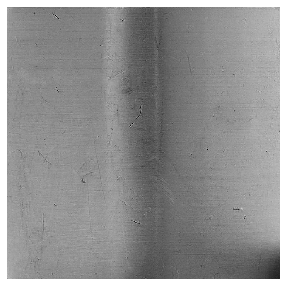

In [32]:
# Sharpening
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

sharpend_img = sg.convolve(sharpen, img, 'valid')
show_img(sharpend_img)

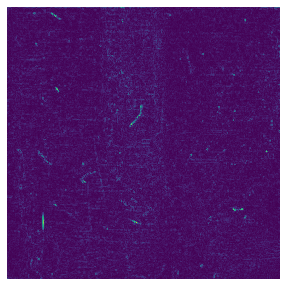

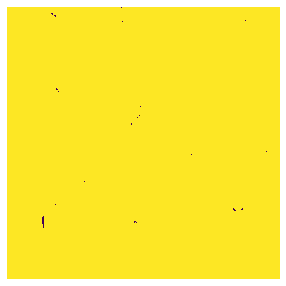

In [33]:
# Edge Detection
sigma = 1

img_x = np.zeros(sharpend_img.shape)
img_y = np.zeros(sharpend_img.shape)

filters.gaussian_filter(sharpend_img, (sigma, sigma), (0, 1), img_x)
filters.gaussian_filter(sharpend_img, (sigma, sigma), (1, 0), img_y)
magnitude = np.sqrt(img_x**2 + img_y**2)
show_img(magnitude, color=True)

scratches = threshold(magnitude, 0.5, percent=True)
show_img(scratches,color=True)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


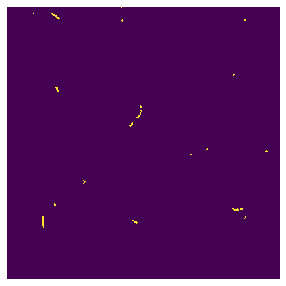

In [34]:
# Morphology
binary_img = scratches.astype(bool)  # make binary
binary_img = np.logical_not(binary_img)  # invert

struct_elem = morph.generate_binary_structure(2, 1)
print(struct_elem.astype(int))

#scratches_dial = morph.binary_dilation(binary_img, struct_elem, 1)
show_img(scratches_dial, color=True)

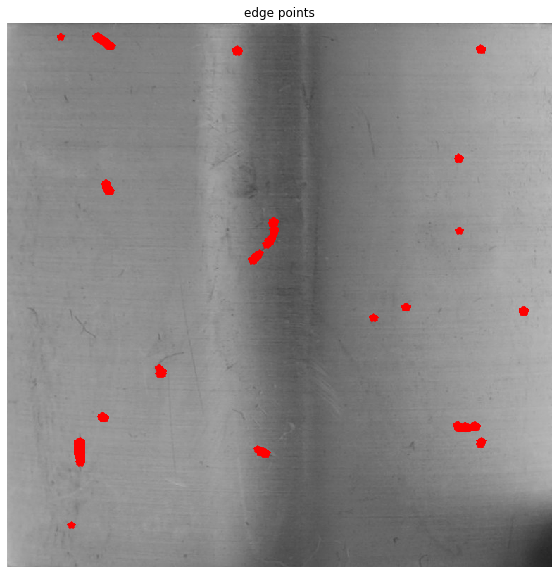

In [35]:
# Points
points = get_points(scratches_dial, min_dist=10, allow_cluster=True)
overlay_points(img, points, size=(10, 10))

In [36]:
# Count 
labels, num_scraches = measure.label(scratches_dial)
print("Number of Scraches: ", num_scraches)

Number of Scraches:  26
